In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from os import path
import xarray as xr
from matplotlib.colors import Normalize
from mpl_toolkits.basemap import Basemap
from collections import Counter
import sys
sys.path.append('../')
from mmctools.helper_functions import calc_uv
from pydicts.obsdict import read_AWOS
from mmctools.helper_functions import calc_wind
from mmctools.wrf.utils import Tower, tsout_seriesReader
import pydicts.baybreezedict as bbd
import pickle


In [6]:
fdir      = '/Users/hawbecke/Research/Chesapeake/Data/Obs/'
fsave_str = '{}AWOS/AWOS_{}_{}to{}.nc'
f_asos    = 'Maryland_ASOS_Jan2000toDec2019.txt'


obs_type = ['AWOS','ASOS']

detection_method = ['StaufferThompson2015','Stauffer2015','Sikora2010']

nobs = len(obs_type)
nmds = len(detection_method)

In [7]:
bb_dict = {}
for oo,obs_t in enumerate(obs_type):
    for mm,meth in enumerate(detection_method):
        
        if obs_t == 'AWOS':
            fpath = '{}{}/2007_to_2020/{}_{}_bay_breeze.nc'.format(fdir,obs_t,obs_t,detection_method[mm])
        if obs_t == 'ASOS':
            fpath = '{}{}/5min/{}_{}_bay_breeze.nc'.format(fdir,obs_t,obs_t,detection_method[mm])
        print(fpath)
        bb_dict['{}-{}'.format(obs_t,meth)] = xr.open_dataset(fpath)

station_list = np.asarray([])
for item in bb_dict:
    station_list = np.append(station_list,bb_dict[item].station.values)
station_list = np.unique(station_list)
nstation = len(station_list)

/Users/hawbecke/Research/Chesapeake/Data/Obs/AWOS/2007_to_2020/AWOS_StaufferThompson2015_bay_breeze.nc
/Users/hawbecke/Research/Chesapeake/Data/Obs/AWOS/2007_to_2020/AWOS_Stauffer2015_bay_breeze.nc
/Users/hawbecke/Research/Chesapeake/Data/Obs/AWOS/2007_to_2020/AWOS_Sikora2010_bay_breeze.nc
/Users/hawbecke/Research/Chesapeake/Data/Obs/ASOS/5min/ASOS_StaufferThompson2015_bay_breeze.nc
/Users/hawbecke/Research/Chesapeake/Data/Obs/ASOS/5min/ASOS_Stauffer2015_bay_breeze.nc
/Users/hawbecke/Research/Chesapeake/Data/Obs/ASOS/5min/ASOS_Sikora2010_bay_breeze.nc


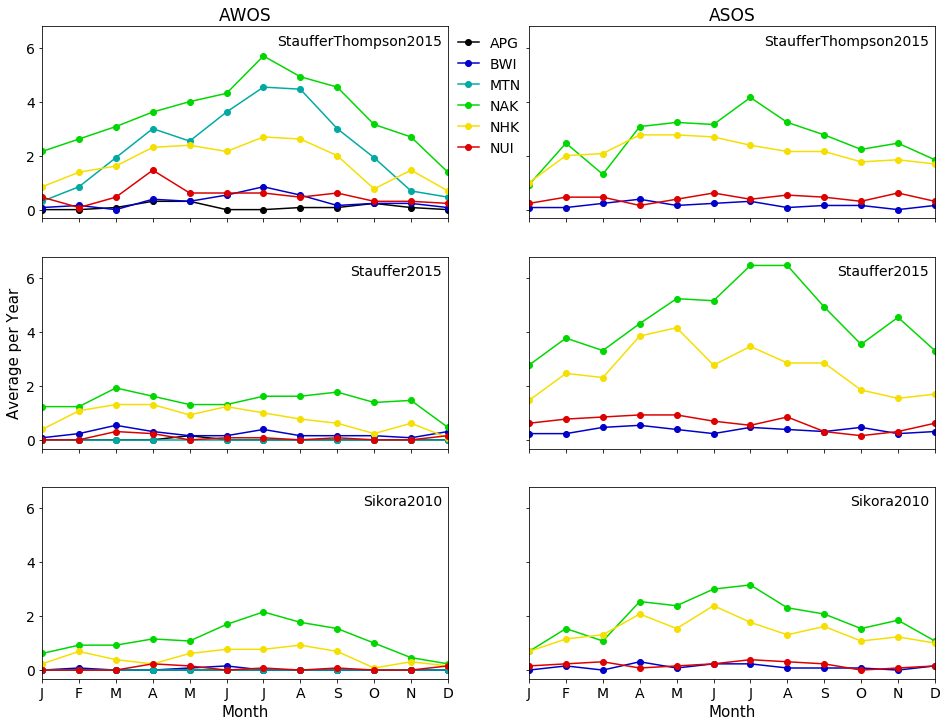

In [8]:
bb_colors = plt.cm.nipy_spectral(np.linspace(0,0.9,nstation))

fig,ax = plt.subplots(nrows=nmds,ncols=nobs,figsize=(16,12),sharex=True,sharey=True)

for oo,obs_t in enumerate(obs_type):
    for mm,meth in enumerate(detection_method):
        month_count = bb_dict['{}-{}'.format(obs_t,meth)].validated_count.mean(dim='year')
        for stn in month_count.station.values:
            stn_col = bb_colors[np.where(station_list==stn)[0][0]]
            month_count.sel(station=stn).plot(ax=ax[mm,oo],label=stn,c=stn_col,marker='o')
        #print('{}{}_{}_bay_breeze.nc'.format(fdir,obs_type[oo],detection_method[mm]))
        #ds = xr.open_dataset('{}{}_{}_bay_breeze.nc'.format(fdir,obs_type[0],detection_method[0]))
        ax[mm,oo].text(11.85,6.5,'{}'.format(meth),size=14,ha='right',va='top')
        if mm == 0:
            ax[mm,oo].set_title(obs_t,size=17)
        else:
            ax[mm,oo].set_title('')
        
        if oo == 0:
            if mm == 1:
                ax[mm,oo].set_ylabel('Average per Year',size=15)
            else:
                ax[mm,oo].set_ylabel('',size=15)
        else:
            ax[mm,oo].set_ylabel('',size=15)

        if mm == 2:
            ax[mm,oo].set_xlabel('Month',size=15)
        else:
            ax[mm,oo].set_xlabel('',size=15)
        ax[mm,oo].tick_params(labelsize=14)
            
ax[0,0].set_xticks(np.arange(1,13))
ax[0,0].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])        
ax[0,0].set_xlim(1,12)
ax[0,0].legend(frameon=False,loc=(1.01,0.3),fontsize=14,handlelength=1.5)
plt.show()

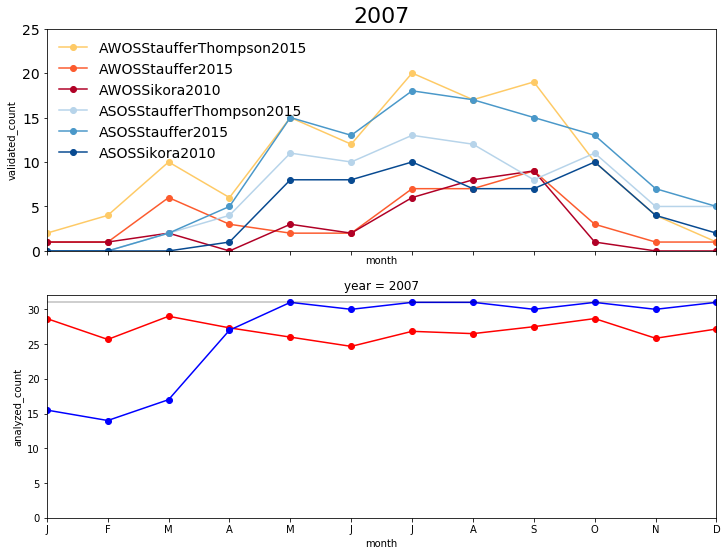

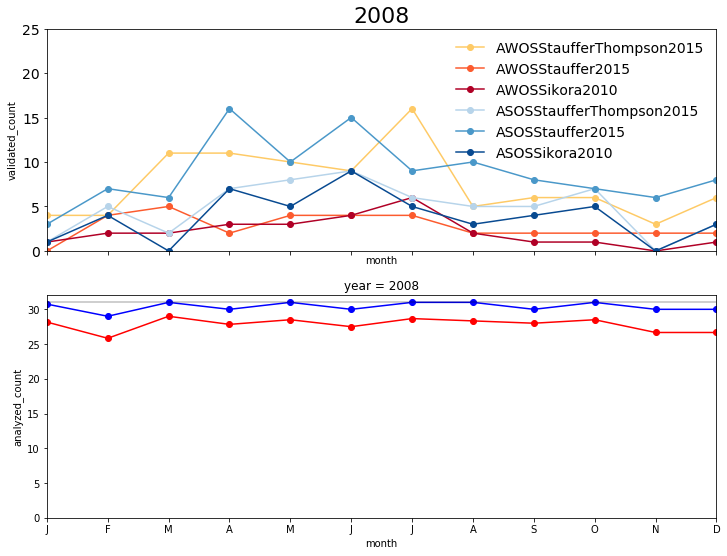

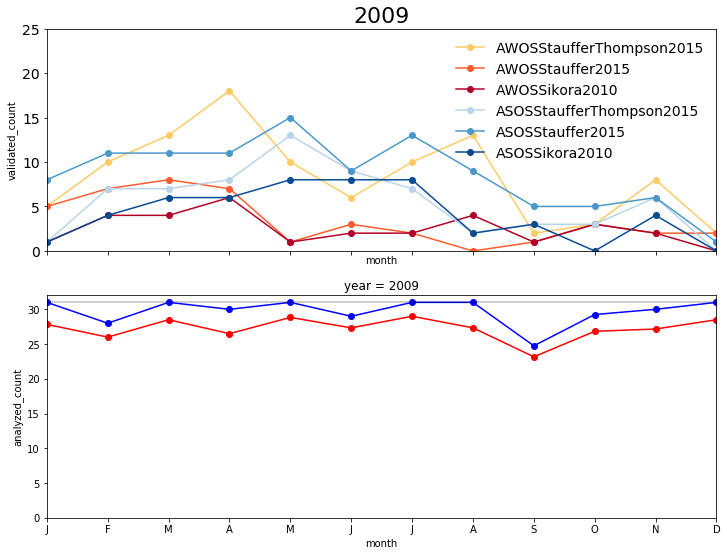

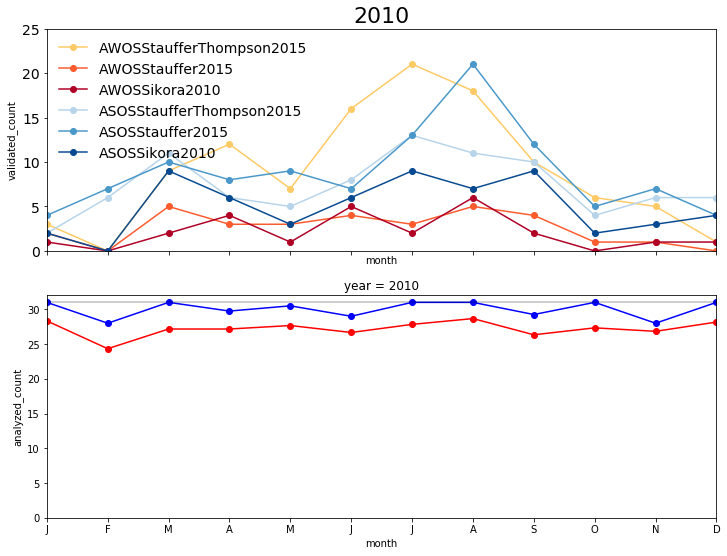

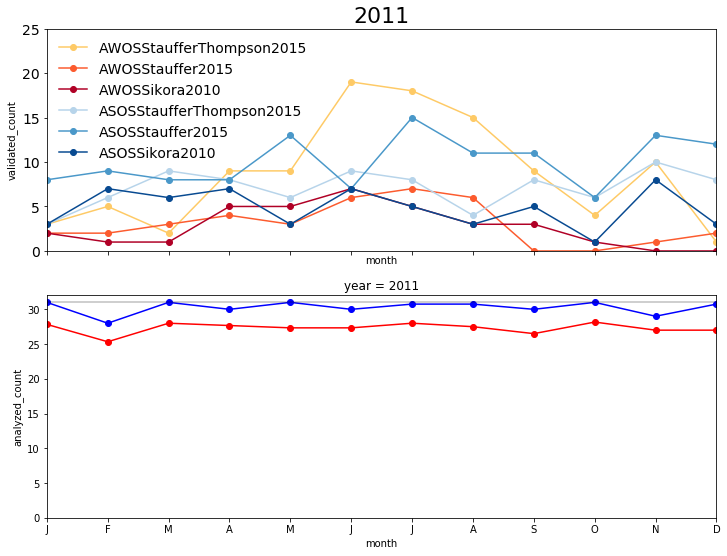

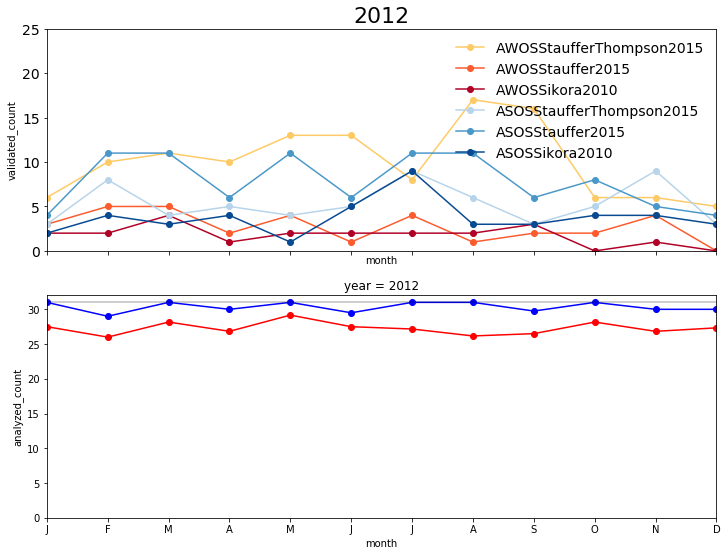

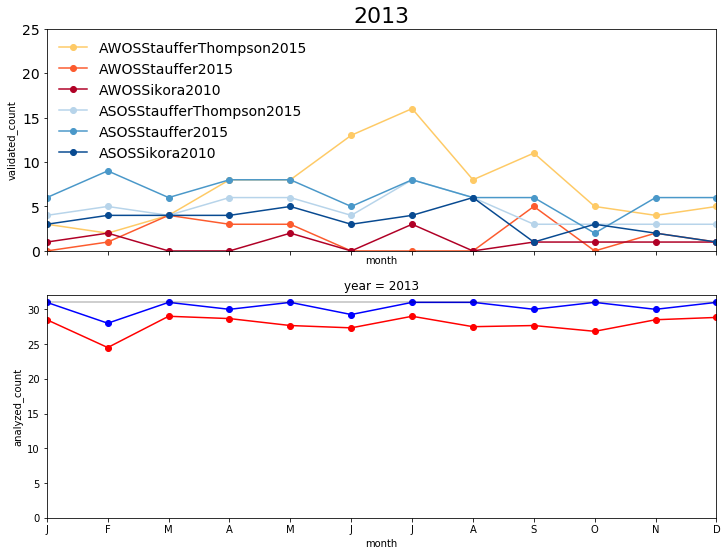

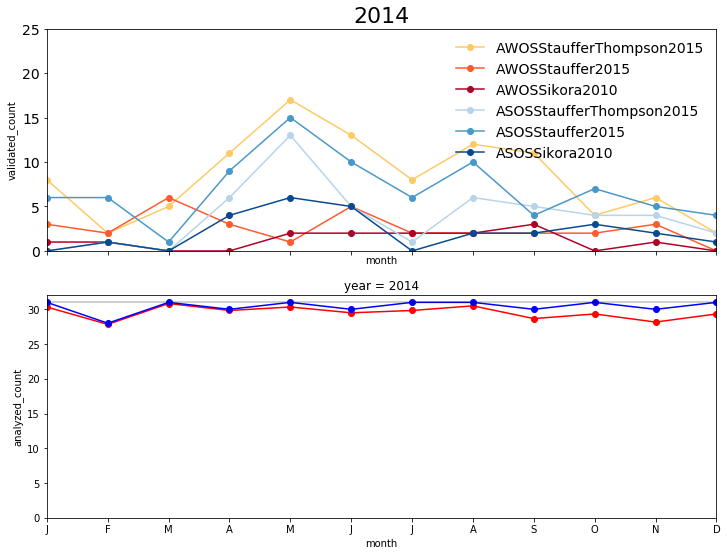

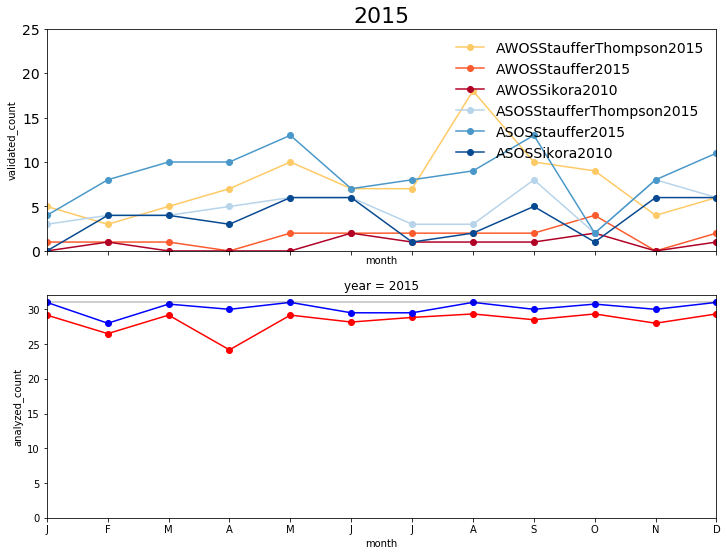

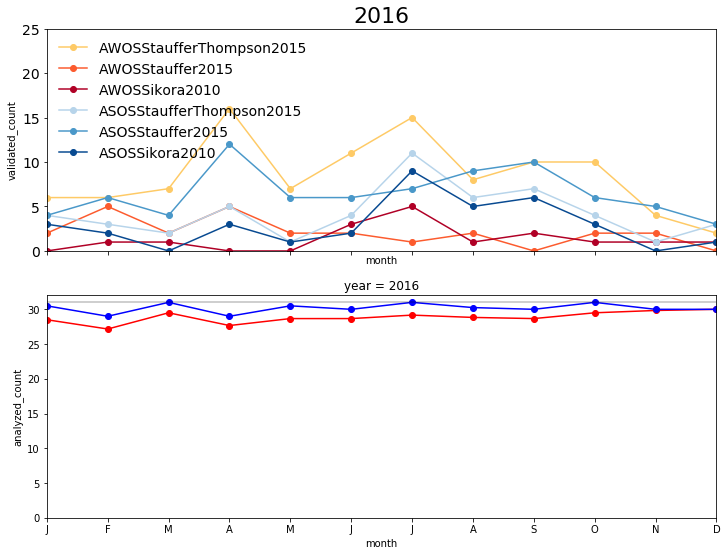

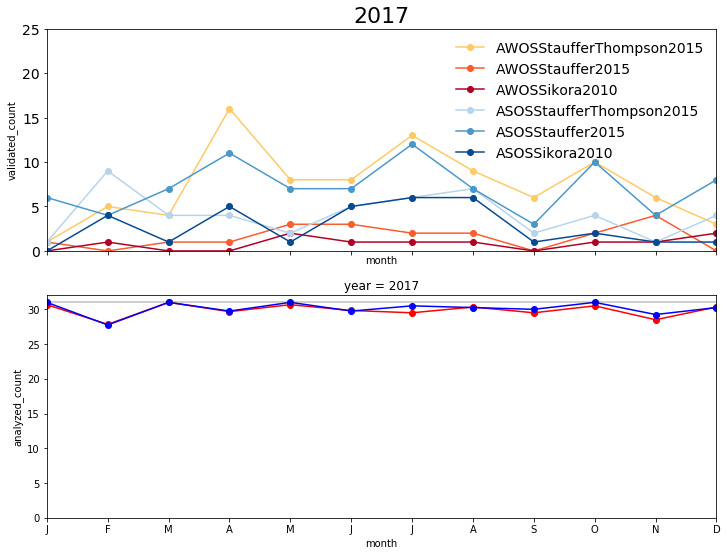

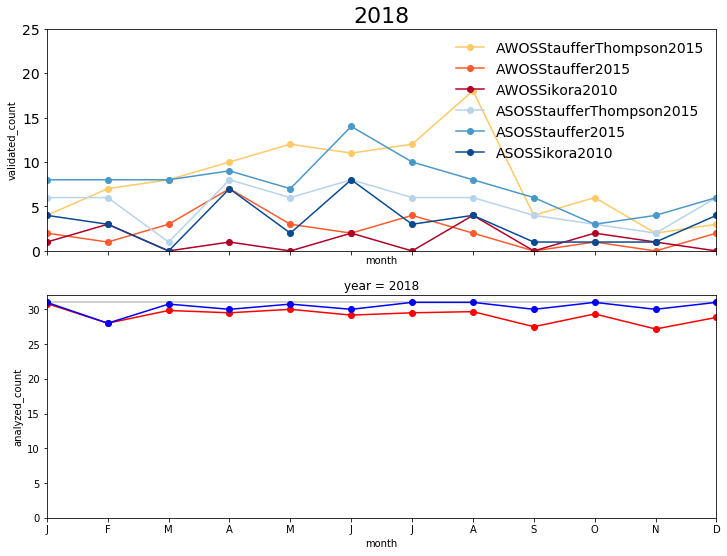

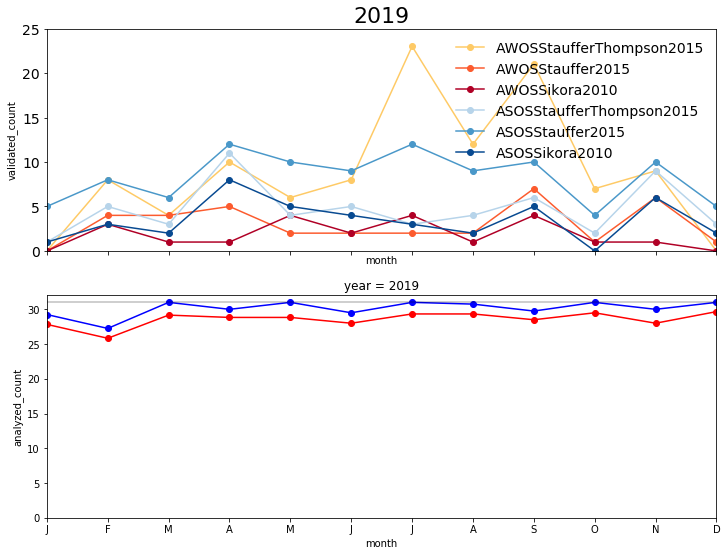

In [9]:
obs_c = ['r','b']
obs_colors = [plt.cm.YlOrRd,plt.cm.Blues]
meth_colors = []
for yy,year in enumerate(np.arange(2007,2020,1)):
    fig,ax = plt.subplots(nrows=2, figsize=(12,9),sharex=True)
    for oo,obs_t in enumerate(obs_type):
        meth_colors = obs_colors[oo](np.linspace(0.3,0.9,nmds))
        for mm,meth in enumerate(detection_method):
            month_count = bb_dict['{}-{}'.format(obs_t,meth)].validated_count.sel(year=year).sum(dim='station')
            month_count.plot.line(marker='o',label='{}{}'.format(obs_t,meth),ax=ax[0],c=meth_colors[mm])
        analy_count = bb_dict['{}-{}'.format(obs_t,meth)].analyzed_count.sel(year=year).mean(dim='station')
        analy_count.plot.line(marker='o',label='{}{}'.format(obs_t,meth),ax=ax[1],c=obs_c[oo])
    ax[0].legend(fontsize=14,frameon=False)
    ax[0].set_title(year,size=22)
    ax[0].set_ylim(0,25)
    ax[0].tick_params(labelsize=14)
    ax[1].set_ylim(0,32)
    ax[1].axhline(31,0,13,c='k',alpha=0.25)
    ax[0].set_xlim(1,12)
    ax[0].set_xticks(np.arange(1,13))
    ax[0].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])  
    plt.show()


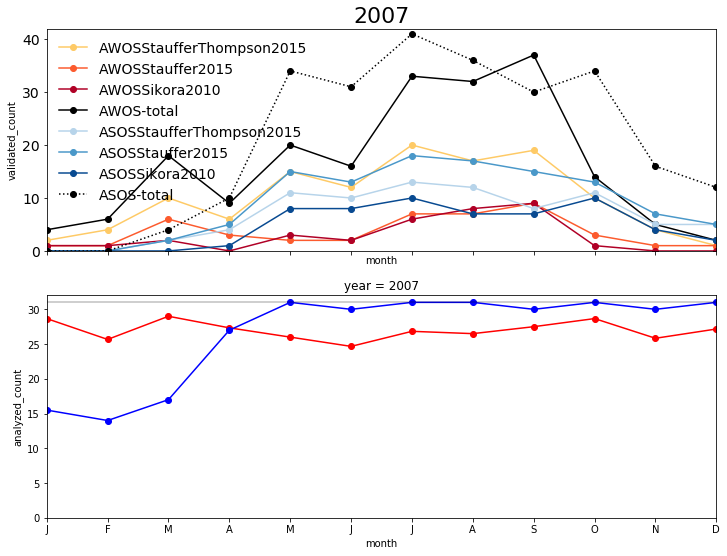

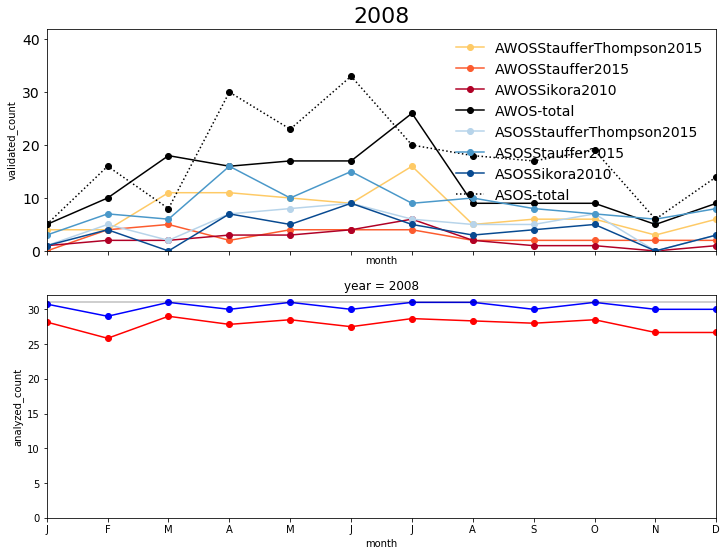

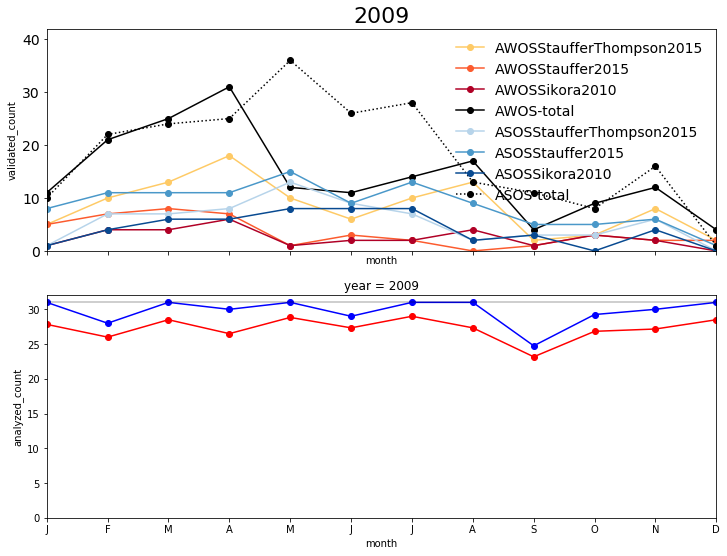

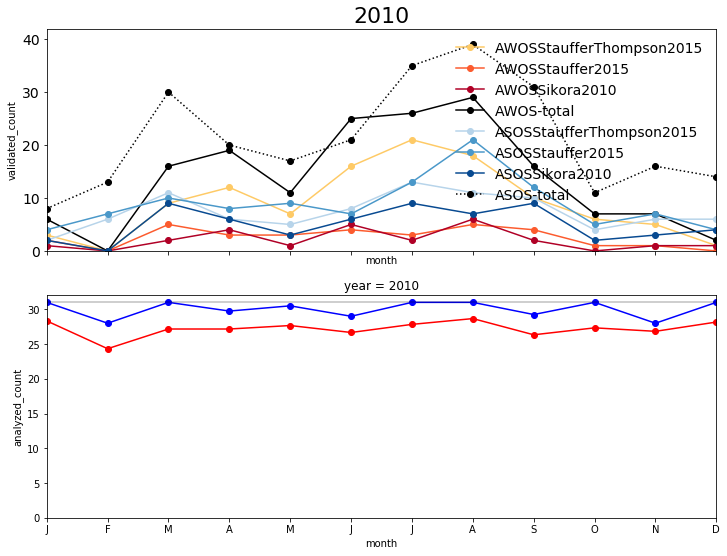

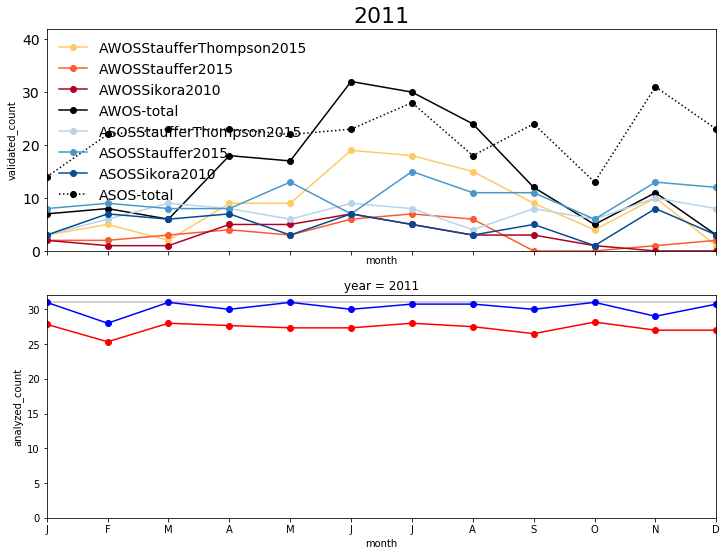

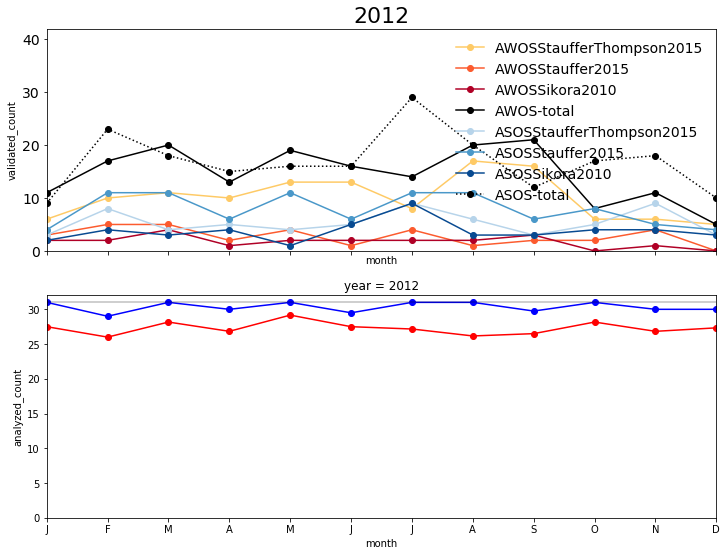

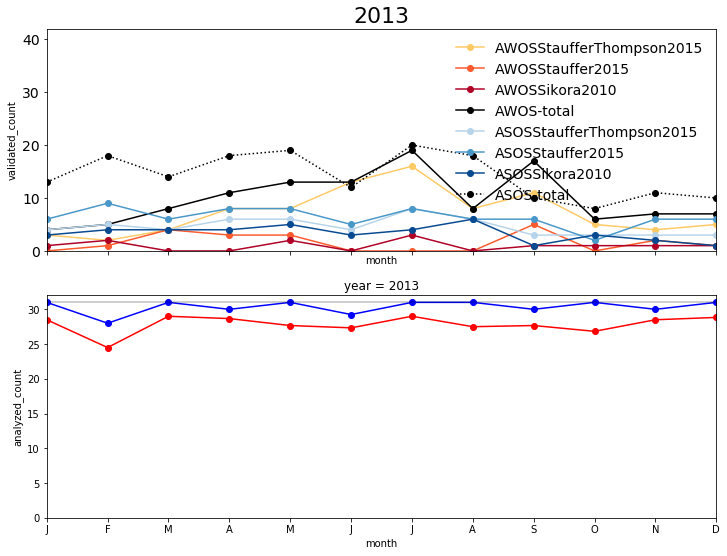

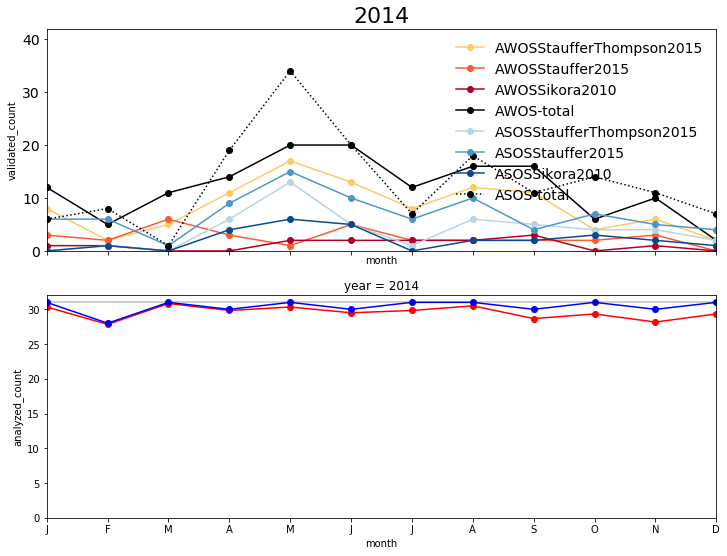

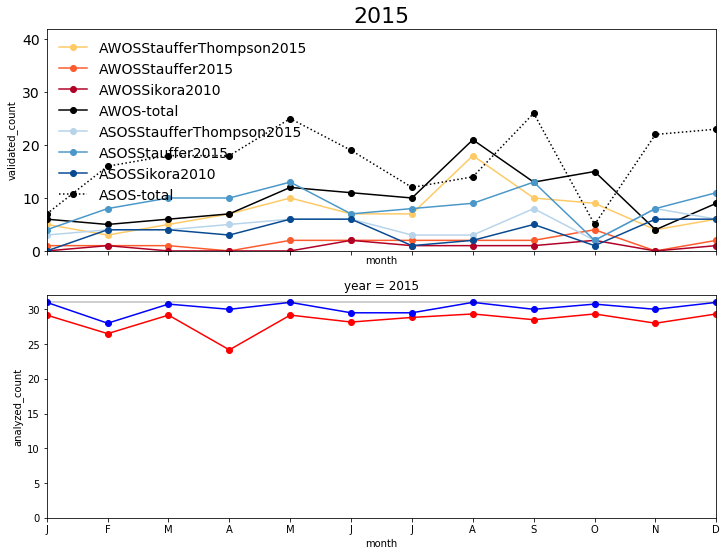

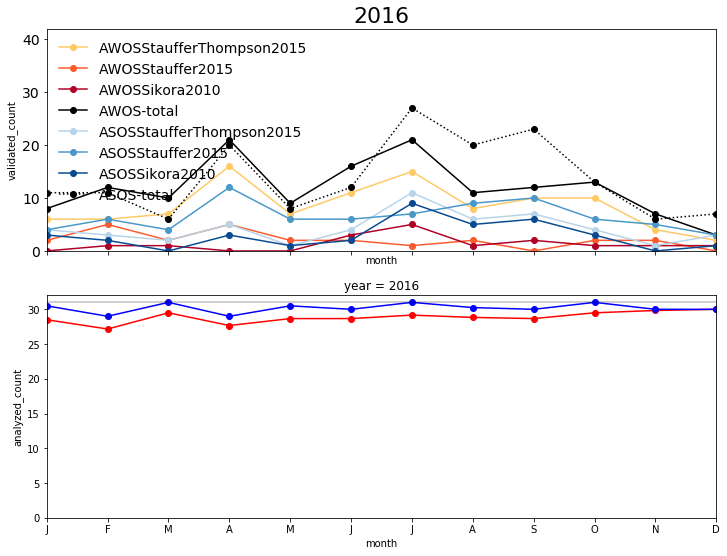

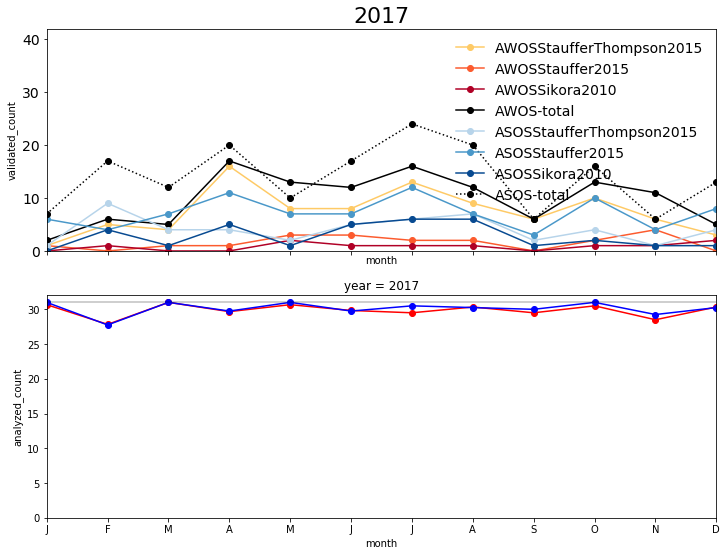

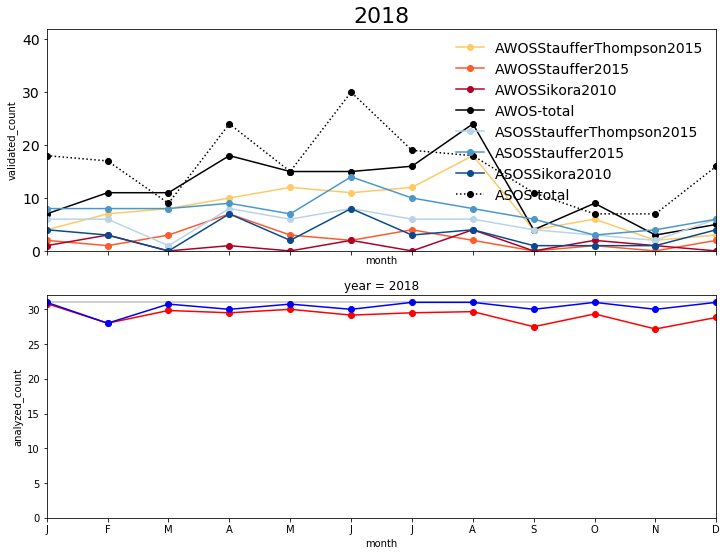

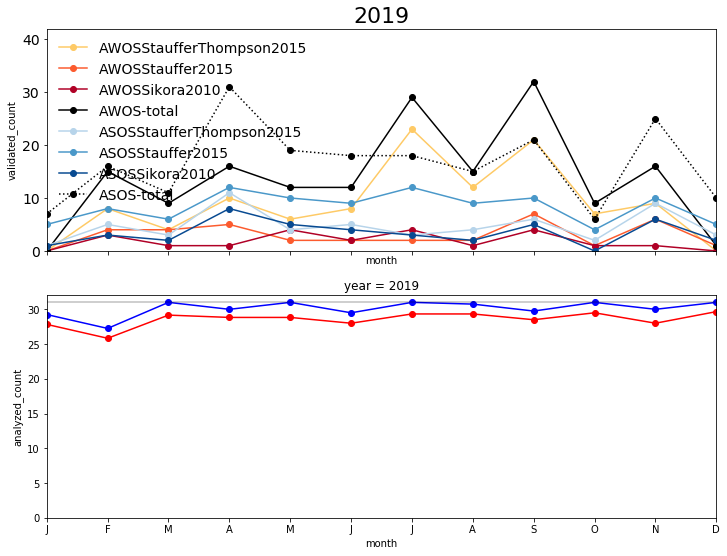

In [18]:
obs_c = ['r','b']
obs_colors = [plt.cm.YlOrRd,plt.cm.Blues]
meth_colors = []
for yy,year in enumerate(np.arange(2007,2020,1)):
    fig,ax = plt.subplots(nrows=2, figsize=(12,9),sharex=True)
    for oo,obs_t in enumerate(obs_type):
        if oo == 0:
            total_ls = '-'
        else:
            total_ls = ':'
        meth_colors = obs_colors[oo](np.linspace(0.3,0.9,nmds))
        for mm,meth in enumerate(detection_method):
            month_count = bb_dict['{}-{}'.format(obs_t,meth)].validated_count.sel(year=year).sum(dim='station')
            if mm == 0:
                month_total = month_count
            else:
                month_total += month_count
            month_count.plot.line(marker='o',label='{}{}'.format(obs_t,meth),ax=ax[0],c=meth_colors[mm])
        month_total.plot.line(marker='o',label='{}-total'.format(obs_t,meth),ax=ax[0],c='k',ls=total_ls)
        analy_count = bb_dict['{}-{}'.format(obs_t,meth)].analyzed_count.sel(year=year).mean(dim='station')
        analy_count.plot.line(marker='o',label='{}{}'.format(obs_t,meth),ax=ax[1],c=obs_c[oo])
    ax[0].legend(fontsize=14,frameon=False)
    ax[0].set_title(year,size=22)
    ax[0].set_ylim(0,42)
    ax[0].tick_params(labelsize=14)
    ax[1].set_ylim(0,32)
    ax[1].axhline(31,0,13,c='k',alpha=0.25)
    ax[0].set_xlim(1,12)
    ax[0].set_xticks(np.arange(1,13))
    ax[0].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])  
    plt.show()


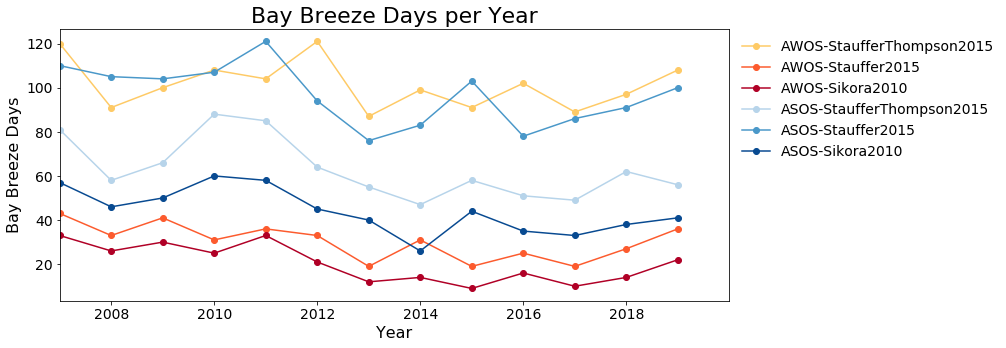

In [7]:
fig = plt.figure(figsize=(12,5))
for oo,obs_t in enumerate(obs_type):
    meth_colors = obs_colors[oo](np.linspace(0.3,0.9,nmds))
    for mm,meth in enumerate(detection_method):
        year_count = bb_dict['{}-{}'.format(obs_t,meth)].validated_count.sum(dim='month').sum(dim='station')
        year_count.plot.line(marker='o',label='{}-{}'.format(obs_t,meth),c=meth_colors[mm])
plt.legend(fontsize=14,frameon=False,loc=(1.01,0.5))
plt.xticks(np.arange(2000,2020,2))
plt.tick_params(labelsize=14)
plt.title('Bay Breeze Days per Year',size=22)
plt.ylabel('Bay Breeze Days',size=16)
plt.xlabel('Year',size=16)
plt.xlim(2007,2020)
plt.show()

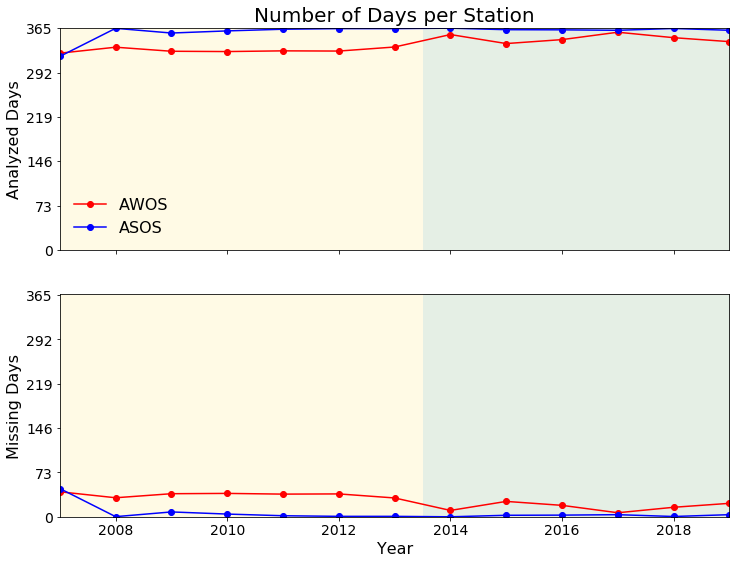

In [8]:
fig,ax = plt.subplots(nrows=2,figsize=(12,9),sharex=True,sharey=True)
for oo,obs_t in enumerate(obs_type):
    anlz_plt = bb_dict['{}-{}'.format(obs_t,detection_method[0])].analyzed_count.sum(dim='month').mean(dim='station')
    anlz_plt.plot(ax=ax[0],c=obs_c[oo],label=obs_t,marker='o')
    miss_plt = bb_dict['{}-{}'.format(obs_t,detection_method[0])].missing_count.sum(dim='month').mean(dim='station')
    miss_plt.plot(ax=ax[1],c=obs_c[oo],marker='o')

ax[0].fill_between([2005.5,2013.5],370,alpha=0.1,color='gold',lw=0.0)
ax[1].fill_between([2005.5,2013.5],370,alpha=0.1,color='gold',lw=0.0)
ax[0].fill_between([2013.5,2019.5],370,alpha=0.1,color='darkgreen',lw=0.0)
ax[1].fill_between([2013.5,2019.5],370,alpha=0.1,color='darkgreen',lw=0.0)
ax[0].legend(fontsize=16,frameon=False)
ax[0].set_xticks(np.arange(2000,2020,2))
ax[0].set_yticks(np.arange(0,366,73))
ax[0].set_title('Number of Days per Station',size=20)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[0].set_ylabel('Analyzed Days',size=16)
ax[1].set_ylabel('Missing Days',size=16)
ax[0].set_xlabel('',size=16)
ax[1].set_xlabel('Year',size=16)
ax[0].set_xlim(2007,2019)
ax[1].set_ylim(0,366)
plt.show()

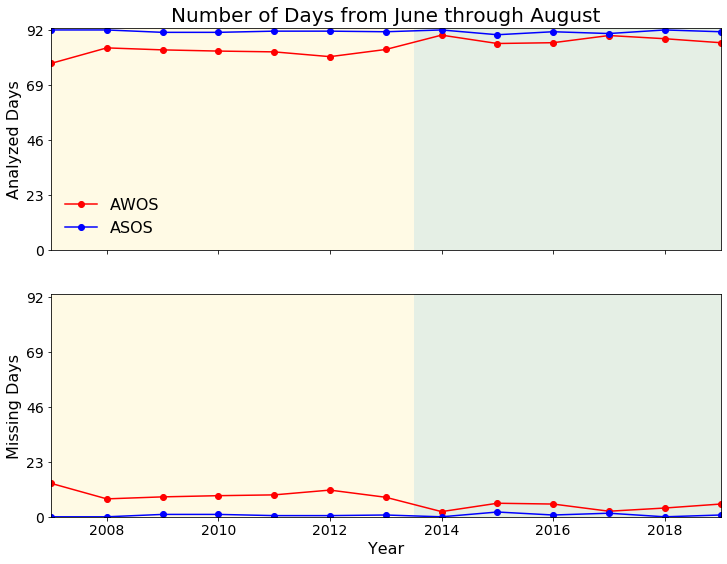

In [9]:
month_names = ['January','February','March','April','May','June','July','August','September','November','December']
monthstart,monthend = 6,8
fig,ax = plt.subplots(nrows=2,figsize=(12,9),sharex=True,sharey=True)
for oo,obs_t in enumerate(obs_type):
    anlz_plt = bb_dict['{}-{}'.format(obs_t,detection_method[0])].analyzed_count.sel(
        month=slice(monthstart,monthend)).sum(dim='month').mean(dim='station')
    anlz_plt.plot(ax=ax[0],c=obs_c[oo],label=obs_t,marker='o')
    miss_plt = bb_dict['{}-{}'.format(obs_t,detection_method[0])].missing_count.sel(
        month=slice(monthstart,monthend)).sum(dim='month').mean(dim='station')
    miss_plt.plot(ax=ax[1],c=obs_c[oo],marker='o')

numdays = np.ceil((monthend - monthstart + 1)*30.5)
ax[0].fill_between([2005.5,2013.5],370,alpha=0.1,color='gold',lw=0.0)
ax[1].fill_between([2005.5,2013.5],370,alpha=0.1,color='gold',lw=0.0)
ax[0].fill_between([2013.5,2019.5],370,alpha=0.1,color='darkgreen',lw=0.0)
ax[1].fill_between([2013.5,2019.5],370,alpha=0.1,color='darkgreen',lw=0.0)

ax[0].legend(fontsize=16,frameon=False)
ax[0].set_xticks(np.arange(2000,2020,2))
ax[0].set_yticks(np.arange(0,numdays+1,23))
ax[0].set_title('Number of Days from {} through {}'.format(month_names[monthstart-1],month_names[monthend-1]),size=20)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[0].set_ylabel('Analyzed Days',size=16)
ax[1].set_ylabel('Missing Days',size=16)
ax[0].set_xlabel('',size=16)
ax[1].set_xlabel('Year',size=16)
ax[0].set_xlim(2007,2019)
ax[1].set_ylim(0,numdays+1)
plt.show()

# Get list of days where multiple stations validate a bay breeze

In [11]:
print('Your options are:')
print('-----------------')
for oo,obs_t in enumerate(obs_type):
    for mm,meth in enumerate(detection_method):
        print('{}-{}'.format(obs_t,detection_method[mm]))

Your options are:
-----------------
AWOS-StaufferThompson2015
AWOS-Stauffer2015
AWOS-Sikora2010
ASOS-StaufferThompson2015
ASOS-Stauffer2015
ASOS-Sikora2010


In [41]:
bay_breeze_ds = bb_dict['AWOS-StaufferThompson2015'].copy()
days = bay_breeze_ds.day.data
for ss,stn in enumerate(bay_breeze_ds.station.values):
    val_days = bay_breeze_ds.sel(station=stn).validated_days.data
    for vv,val in enumerate(val_days): 
        if val == 'True': val_days[vv] = True
        if val == 'False': val_days[vv] = False
    #print(list(days[np.where(val_days==True)]))
    if ss == 0: 
        val_days_full = days[np.where(val_days==True)]
    else:
        val_days_full = np.concatenate([val_days_full,days[np.where(val_days==True)]])

val_days_full_list = list(val_days_full)
dup_2stn = []
dup_3stn = []
dup_4stn = []
dup_5stn = []
for item in val_days_full_list:
    if val_days_full_list.count(item) == 2:
        dup_2stn.append(item)
    if val_days_full_list.count(item) == 3:
        dup_3stn.append(item)
    if val_days_full_list.count(item) == 4:
        dup_4stn.append(item)
    if val_days_full_list.count(item) == 5:
        dup_5stn.append(item)
        
dup_2stn = np.unique(sorted(dup_2stn))
dup_3stn = np.unique(sorted(dup_3stn))
dup_4stn = np.unique(sorted(dup_4stn))
dup_5stn = np.unique(sorted(dup_5stn))

In [42]:
for day in dup_2stn:
    stn_list_day_2stn = []
    for stn in bay_breeze_ds.station.values:
        if bay_breeze_ds.sel(station=stn,day=day).validated_days.values == 'True':
            stn_list_day_2stn.append(stn)
    print(day,stn_list_day_2stn)

2007-02-17T00:00:00.000000000 ['MTN', 'NAK']
2007-02-27T00:00:00.000000000 ['NAK', 'NHK']
2007-03-19T00:00:00.000000000 ['MTN', 'NAK']
2007-04-21T00:00:00.000000000 ['MTN', 'NHK']
2007-05-22T00:00:00.000000000 ['MTN', 'NAK']
2007-05-26T00:00:00.000000000 ['MTN', 'NAK']
2007-05-30T00:00:00.000000000 ['MTN', 'NAK']
2007-05-31T00:00:00.000000000 ['NAK', 'NHK']
2007-07-03T00:00:00.000000000 ['MTN', 'NAK']
2007-07-14T00:00:00.000000000 ['MTN', 'NAK']
2007-07-28T00:00:00.000000000 ['MTN', 'NAK']
2007-08-02T00:00:00.000000000 ['MTN', 'NHK']
2007-08-03T00:00:00.000000000 ['MTN', 'NHK']
2007-08-07T00:00:00.000000000 ['MTN', 'NAK']
2007-08-12T00:00:00.000000000 ['MTN', 'NAK']
2007-08-14T00:00:00.000000000 ['NAK', 'NHK']
2007-09-03T00:00:00.000000000 ['MTN', 'NAK']
2007-09-04T00:00:00.000000000 ['NAK', 'NHK']
2007-09-21T00:00:00.000000000 ['MTN', 'NAK']
2007-09-26T00:00:00.000000000 ['MTN', 'NAK']
2007-10-03T00:00:00.000000000 ['MTN', 'NAK']
2007-11-05T00:00:00.000000000 ['MTN', 'NAK']
2008-03-11

In [43]:
for day in dup_3stn:
    stn_list_day_3stn = []
    for stn in bay_breeze_ds.station.values:
        if bay_breeze_ds.sel(station=stn,day=day).validated_days.values == 'True':
            stn_list_day_3stn.append(stn)
    print(day,stn_list_day_3stn)

2007-03-12T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2007-03-30T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2007-04-22T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2007-06-13T00:00:00.000000000 ['BWI', 'MTN', 'NAK']
2007-07-09T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2007-09-08T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2007-09-25T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2007-10-17T00:00:00.000000000 ['MTN', 'NAK', 'NUI']
2008-12-23T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2009-03-22T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2009-04-19T00:00:00.000000000 ['MTN', 'NAK', 'NUI']
2009-04-26T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2009-07-19T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2010-03-09T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2010-04-04T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2010-06-18T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2010-07-06T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2010-07-31T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2011-06-06T00:00:00.000000000 ['MTN', 'NAK', 'NHK']
2012-01-28T0

In [44]:
for day in dup_4stn:
    stn_list_day_4stn = []
    for stn in bay_breeze_ds.station.values:
        if bay_breeze_ds.sel(station=stn,day=day).validated_days.values == 'True':
            stn_list_day_4stn.append(stn)
    print(day,stn_list_day_4stn)

2014-05-06T00:00:00.000000000 ['APG', 'MTN', 'NAK', 'NHK']


In [45]:
unique_day_dict = {}
for month in range(1,13):
    for day in np.unique(val_days_full_list):
        if pd.to_datetime(day).year == 2019:
            if pd.to_datetime(day).month == month:
                month_bb_stns = []
                for stn in bay_breeze_ds.station.values:
                    if bay_breeze_ds.sel(station=stn,day=day).validated_days.values == 'True':
                        month_bb_stns.append(stn)
                if len(month_bb_stns) > 0:
                    unique_day_dict[day] = month_bb_stns

In [46]:
for month in range(1,12):
    print('Unique days in {}'.format(month_names[month-1]))
    for val in unique_day_dict:
        if pd.to_datetime(val).month == month:
            print(str(val)[:10],unique_day_dict[val])
    print()

Unique days in January

Unique days in February
2019-02-02 ['MTN']
2019-02-04 ['MTN']
2019-02-05 ['NAK']
2019-02-10 ['NAK', 'NHK']
2019-02-14 ['NAK']
2019-02-26 ['NHK', 'NUI']

Unique days in March
2019-03-19 ['MTN', 'NAK']
2019-03-24 ['NAK']
2019-03-28 ['NUI']

Unique days in April
2019-04-01 ['NHK']
2019-04-06 ['MTN', 'NAK']
2019-04-07 ['NUI']
2019-04-10 ['NHK']
2019-04-17 ['NAK', 'NUI']
2019-04-20 ['NAK']
2019-04-21 ['NAK', 'NHK']

Unique days in May
2019-05-02 ['NAK']
2019-05-04 ['NUI']
2019-05-06 ['NAK']
2019-05-07 ['APG']
2019-05-23 ['NAK']
2019-05-30 ['NAK']

Unique days in June
2019-06-17 ['MTN', 'NAK']
2019-06-26 ['MTN', 'NAK']
2019-06-27 ['MTN', 'NAK']
2019-06-28 ['MTN', 'NAK']

Unique days in July
2019-07-09 ['MTN', 'NAK']
2019-07-10 ['NUI']
2019-07-11 ['NAK']
2019-07-15 ['MTN', 'NAK']
2019-07-16 ['NHK']
2019-07-17 ['NAK']
2019-07-19 ['MTN']
2019-07-20 ['MTN']
2019-07-24 ['NUI']
2019-07-26 ['BWI', 'MTN', 'NAK']
2019-07-27 ['MTN', 'NHK']
2019-07-28 ['NAK', 'NHK']
2019-07-29 [

### Using ASOS-Stauffer2015

In [55]:
for month in range(1,12):
    print('Unique days in {}'.format(month_names[month-1]))
    for val in unique_day_dict:
        if pd.to_datetime(val).month == month:
            print(str(val)[:10],unique_day_dict[val])
    print()

Unique days in January
2019-01-02 ['NUI']
2019-01-04 ['NAK']
2019-01-08 ['NAK']
2019-01-17 ['NAK', 'NHK']

Unique days in February
2019-02-05 ['NAK', 'NHK']
2019-02-10 ['NAK']
2019-02-14 ['NAK', 'NHK']
2019-02-16 ['NHK']
2019-02-21 ['NAK']
2019-02-26 ['NHK']

Unique days in March
2019-03-05 ['NAK']
2019-03-10 ['NAK']
2019-03-17 ['NHK']
2019-03-24 ['NAK']
2019-03-25 ['NUI']
2019-03-29 ['NHK']

Unique days in April
2019-04-01 ['NHK']
2019-04-04 ['NAK']
2019-04-06 ['NAK']
2019-04-09 ['NAK']
2019-04-10 ['NHK']
2019-04-13 ['NAK']
2019-04-20 ['NAK']
2019-04-21 ['NAK']
2019-04-23 ['NAK', 'NHK']
2019-04-30 ['NAK', 'NHK']

Unique days in May
2019-05-02 ['NAK']
2019-05-04 ['NUI']
2019-05-05 ['NUI']
2019-05-06 ['NAK', 'NHK']
2019-05-08 ['NUI']
2019-05-16 ['NAK']
2019-05-23 ['NAK']
2019-05-27 ['NAK']
2019-05-30 ['NAK']

Unique days in June
2019-06-01 ['NAK']
2019-06-10 ['NAK']
2019-06-13 ['NAK']
2019-06-18 ['NAK']
2019-06-24 ['NAK']
2019-06-26 ['NAK']
2019-06-27 ['NAK']
2019-06-28 ['NAK', 'NHK']



In [2]:
import pandas as pd

In [4]:
bb_detection_dict_fname = '/Users/hawbecke/Research/Chesapeake/Data/WRF/SENSITIVITY_TESTS/wrf_bay_breeze_detections.txt'
bb_case_df = pd.read_csv(bb_detection_dict_fname,delimiter='\t',names=['case','method','station','detection_dates'])

In [7]:
bb_case_df.head()

,case,method,station,detection_dates
0,ERAI_YSU_CHRN_OST_NOSK_4DOM_d03,StaufferThompson2015,BWI,None
1,ERAI_YSU_CHRN_OST_NOSK_4DOM_d03,StaufferThompson2015,MTN,"2019-07-16_00:00:00,2019-07-27_00:00:00,2019-0..."
2,ERAI_YSU_CHRN_OST_NOSK_4DOM_d03,StaufferThompson2015,NAK,"2019-07-16_00:00:00,2019-07-28_00:00:00,2019-0..."
3,ERAI_YSU_CHRN_OST_NOSK_4DOM_d03,StaufferThompson2015,NHK,2019-07-25_00:00:00
4,ERAI_YSU_CHRN_OST_NOSK_4DOM_d03,StaufferThompson2015,NUI,2019-07-24_00:00:00


In [14]:
t_s = pd.to_datetime('2019-07-16 00:00:00')
t_e = pd.to_datetime('2019-08-01 00:00:00')

In [151]:
stn_str_dict = {'BWI':'B',
                'NAK':'A',
                'NHK':'H',
                'NUI':'N',
                'MTN':'M'}

mth_str_dict = {'StaufferThompson2015' : 'StTh15',
                        'Stauffer2015' : 'St15',
                          'Sikora2010' : 'Sik10'}

for dd,day in enumerate(pd.date_range(start=t_s, end=t_e)):
    count = 0
    day_line = '{} & '.format('{0:04d}-{1:02d}-{2:02d}'.format(day.year,day.month,day.day))
    init_line = True
#    if dd == 0:
#        header_1 = ''
#        header_2 = ''
    for row in bb_case_df.T.iteritems(): 
        case   = row[1][0]
        method = row[1][1]
        stn    = row[1][2]
        dates  = row[1][3].replace('_',' ')
        if init_line:
            prev_method = method
            prev_case   = case
            
            #header_1    = '| {}'.format(case)
            header_1    = ' Date & \multicolumn{3}{c||}{' + case + '} &'
            #header_2    = 'Date | {}'.format(method)
            header_2    = '  & {}'.format(mth_str_dict[method])
            hd2_fmt     = '|r|c|'
            init_line = False
            
        if method != prev_method:
            day_line = day_line[:-1] + ' & '
            if dd == 0:
                if case != prev_case:
                    #header_1 = header_1 + ' || {}'.format(case)
                    header_1 = header_1 + '\multicolumn{3}{c||}{' + case + '} &'
                    #header_2 = header_2 + ' || {}'.format(method)
                    header_2 = header_2 + ' & {}'.format(mth_str_dict[method])
                    hd2_fmt = hd2_fmt + '|c|'
                else:
                    #header_2 = header_2 + ' | {}'.format(method)
                    header_2 = header_2 + ' & {}'.format(mth_str_dict[method])
                    hd2_fmt = hd2_fmt + 'c|'
                    
        if case != prev_case:
            #day_line = day_line[:-1] + '| '
            day_line = day_line[:-1] + ' '
            
            
        if dates != 'None':
            if str(day) in dates:
                #day_line = day_line + '{},'.format(stn)
                day_line = day_line + '{},'.format(stn_str_dict[stn])
                #day_line = day_line + '✓,'
                
            else:
                # Didn't find this date but there are other dates...
                #day_line = day_line + 'X,'
                day_line = day_line
        else:
            # Didn't find any dates for this case+method+station
            #day_line = day_line + 'X,'
            day_line = day_line
        prev_method = method
        prev_case   = case        
        #print()
        count+=1
        #if count > 6:
        #    print(day_line)
        #    wefwef
    if dd == 0:
        header_1 = header_1[:-1] + ' \\\ \n'
        header_2 = header_2 + ' \\\ \n'
        print(r'\begin{landscape}')
        print(r'\thispagestyle{empty}')
        print(r'    \noindent')
        print(r'\begin{tabular}{ '+hd2_fmt+' }')
        print(r'\hline')
        print(header_1)
        print(header_2)
        print(r'\hline')
        print(r'\hline')
    day_line = day_line[:-1] + ' \\\ \n'

    print(day_line)
    print(r'\hline')
print(r'\end{tabular}')
print(r'\end{landscape}')

\begin{landscape}
\thispagestyle{empty}
    \noindent
\begin{tabular}{ |r|c|c|c||c|c|c||c|c|c||c|c|c||c|c|c||c|c|c||c|c|c||c|c|c||c|c|c||c|c|c||c|c|c||c|c|c| }
\hline
 Date & \multicolumn{3}{c||}{ERAI_YSU_CHRN_OST_NOSK_4DOM_d03} &\multicolumn{3}{c||}{ERAI_YSU_CHRN_OST_SKNT_3DOM_d03} &\multicolumn{3}{c||}{ERAI_YSU_CHRN_GHR_NOSK_3DOM_d03} &\multicolumn{3}{c||}{ERAI_YSU_CHRN_GHR_SKNT_3DOM_d03} &\multicolumn{3}{c||}{GFSR_YSU_CHRN_GFS_NOSK_3DOM_d03} &\multicolumn{3}{c||}{GFSR_YSU_CHRN_GFS_SKNT_3DOM_d03} &\multicolumn{3}{c||}{GFSR_YSU_CHRN_GHR_NOSK_3DOM_d03} &\multicolumn{3}{c||}{GFSR_YSU_CHRN_GHR_SKNT_3DOM_d03} &\multicolumn{3}{c||}{ERA5_YSU_CHRN_ER5_NOSK_3DOM_d03} &\multicolumn{3}{c||}{ERA5_YSU_CHRN_ER5_SKNT_3DOM_d03} &\multicolumn{3}{c||}{ERA5_YSU_CHRN_ER5_OVER_3DOM_d03} &\multicolumn{3}{c||}{ERA5_YSU_CHRN_ER5_OVSK_3DOM_d03}  \\ 

  & StTh15 & St15 & Sik10 & StTh15 & St15 & Sik10 & StTh15 & St15 & Sik10 & StTh15 & St15 & Sik10 & StTh15 & St15 & Sik10 & StTh15 & St15 & Sik10 & StTh15 & St1